### 로이터 데이터셋 로드하기

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [11]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

### 데이터셋을 텍스트로 디코딩하기

In [5]:
word_index = reuters.get_word_index()
# get_word_index()는 단어와 정수를 매핑한 딕셔너리를 리턴한다.
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# items()는 키와 값 쌍을 한꺼번에 list로 반환하고, 위의 코드는 value값과 key값을 뒤집어서 dict형식으로 반환하는 것이다.
decoded_newswire = ''.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
# get()은 key값을 통해 value값을 찾아준다. 못찾을 경우에는 ?로 대채한다.

557056/550378 [==============================] - 0s 0us/step


In [7]:
train_labels[0]
# 레이블은 토픽의 인덱스로 0과 45사이의 정수이다.

3

### 데이터 준비

#### 데이터 인코딩하기

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    
    return results

x_train = vectorize_sequences(train_data) # 벡터 변환
x_test = vectorize_sequences(test_data) # 벡터 변환

#### 레이블 인코딩 하기

In [14]:
# 함수로 나타냈을 때
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels) # 벡터 변환
one_hot_test_labels = to_one_hot(test_labels) # 벡터 변환

In [16]:
# 케라스의 내장 함수

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# 근데 test data하고 train 데이터는 넘파이 배열 오브젝트이기 때문에 to_categorical이 안된다.

In [23]:
type(train_labels)

numpy.ndarray

### 모델 구성

#### 46개의 출력클래스가 있어야 하기에 유닛의 개수를 64개로 늘린다.

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### 컴파일

In [29]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### 훈련 검증

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### 모델 훈련하기

In [31]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 59ms/step - loss: 2.7194 - accuracy: 0.5249 - val_loss: 1.8065 - val_accuracy: 0.6570
Epoch 2/20
16/16 [==============================] - 0s 24ms/step - loss: 1.4378 - accuracy: 0.7030 - val_loss: 1.3028 - val_accuracy: 0.7160
Epoch 3/20
16/16 [==============================] - 0s 26ms/step - loss: 1.0469 - accuracy: 0.7750 - val_loss: 1.1202 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8264 - accuracy: 0.8234 - val_loss: 1.0573 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 0s 26ms/step - loss: 0.6619 - accuracy: 0.8586 - val_loss: 0.9596 - val_accuracy: 0.7990
Epoch 6/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5299 - accuracy: 0.8900 - val_loss: 0.9398 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 29ms/step - loss: 0.4304 - accuracy: 0.9117 - val_loss: 0.8955 - val_accuracy: 0.8110
Epoch 8/20
16

#### 훈련과 검증 손실 그리기

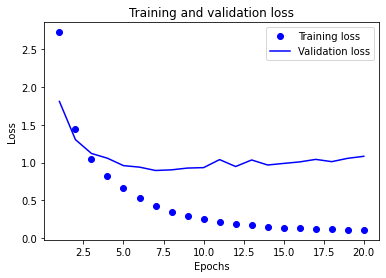

In [32]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#### 훈련과 검증 정확도 그리기

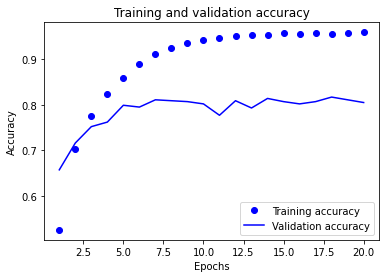

In [33]:
plt.clf() # 그래프 초기화

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### 아홉번째 에포크이후에 과대적합이 시작되므로 다시 훈련시킨다.

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 35ms/step - loss: 2.5347 - accuracy: 0.5313 - val_loss: 1.6571 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 0s 27ms/step - loss: 1.3673 - accuracy: 0.7101 - val_loss: 1.2674 - val_accuracy: 0.7240
Epoch 3/9
16/16 [==============================] - 0s 27ms/step - loss: 1.0127 - accuracy: 0.7801 - val_loss: 1.0978 - val_accuracy: 0.7590
Epoch 4/9
16/16 [==============================] - 0s 25ms/step - loss: 0.7918 - accuracy: 0.8294 - val_loss: 1.0106 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 0s 26ms/step - loss: 0.6278 - accuracy: 0.8695 - val_loss: 0.9465 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 0s 27ms/step - loss: 0.4982 - accuracy: 0.8966 - val_loss: 0.9010 - val_accuracy: 0.8020
Epoch 7/9
16/16 [==============================] - 0s 26ms/step - loss: 0.4032 - accuracy: 0.9161 - val_loss: 0.8760 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

In [36]:
results

[0.9951522946357727, 0.7898486256599426]

#### 새로운 데이터에 대해 예측하기

In [37]:
predictions = model.predict(x_test)

In [38]:
predictions[1].shape

(46,)

In [40]:
np.sum(predictions[1]) # softmax함수 결과물의 수치합은 항상 1

1.0

In [41]:
np.argmax(predictions[1])
# 11번째 토픽이라네. 렐루!!!!!

10

### 추가 실험

#### 3개의 은닉층 사용해보기

In [44]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(partial_x_train,
                   partial_y_train,
                   epochs=8,
                   batch_size=512,
                   validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
16/16 [==============================] - 1s 36ms/step - loss: 2.8137 - accuracy: 0.4595 - val_loss: 1.7810 - val_accuracy: 0.6190
Epoch 2/8
16/16 [==============================] - ETA: 0s - loss: 1.4764 - accuracy: 0.68 - 0s 26ms/step - loss: 1.4691 - accuracy: 0.6896 - val_loss: 1.3264 - val_accuracy: 0.7120
Epoch 3/8
16/16 [==============================] - 0s 26ms/step - loss: 1.0885 - accuracy: 0.7575 - val_loss: 1.1733 - val_accuracy: 0.7450
Epoch 4/8
16/16 [==============================] - 0s 25ms/step - loss: 0.8453 - accuracy: 0.8148 - val_loss: 1.0545 - val_accuracy: 0.7840
Epoch 5/8
16/16 [==============================] - 0s 25ms/step - loss: 0.6679 - accuracy: 0.8520 - val_loss: 0.9933 - val_accuracy: 0.7920
Epoch 6/8
16/16 [==============================] - 0s 29ms/step - loss: 0.5238 - accuracy: 0.8857 - val_loss: 0.9895 - val_accuracy: 0.7960
Epoch 7/8
16/16 [==============================] - 1s 33ms/step - loss: 0.4156 - accuracy: 0.9138 - val_loss: 0.9516 -

In [45]:
results

[1.036943793296814, 0.7853962779045105]